https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
df.week.unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [6]:
# unicos

In [7]:
# valores

In [8]:
df.week.value_counts()

week
Tues     52
Sat      50
Fri      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: count, dtype: int64

In [9]:
# clases

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica (si es necesario)
for col in ['week']:
    df[col] = le.fit_transform(df[col])
df


,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,2,44,45,45.7,44,41,50,44,61
2,2016,1,3,3,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,5,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47
344,2016,12,28,6,42,47,45.3,48,41,49,44,58
345,2016,12,29,4,47,48,45.3,48,43,50,45,65
346,2016,12,30,0,48,48,45.4,57,44,46,44,42


In [12]:
# dummies

In [13]:
# 'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6

In [14]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,0,45,45,45.6,45,43,50,44,29
1,2016,1,2,2,44,45,45.7,44,41,50,44,61
2,2016,1,3,3,45,44,45.8,41,43,46,47,56
3,2016,1,4,1,44,41,45.9,40,44,48,46,53
4,2016,1,5,5,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47
344,2016,12,28,6,42,47,45.3,48,41,49,44,58
345,2016,12,29,4,47,48,45.3,48,43,50,45,65
346,2016,12,30,0,48,48,45.4,57,44,46,44,42


In [15]:
# agurpar por mes y quedarse con la media de la columna temp_1

monthly_temps = df.groupby('month')['temp_1'].mean()
monthly_temps= pd.DataFrame(monthly_temps)
monthly_temps

,temp_1
month,
1,49.677419
2,54.115385
3,56.483871
4,66.433333
5,68.838710
6,73.233333
7,76.225806
8,77.947368
9,70.428571


In [16]:
# merge del dataframe anterior con el original
# Merge with original dataframe
df2 = df.merge(monthly_temps, on='month', how='left')
df2

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,2016,1,1,0,45,45,45.6,45,43,50,44,29,49.677419
1,2016,1,2,2,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,3,45,44,45.8,41,43,46,47,56,49.677419
3,2016,1,4,1,44,41,45.9,40,44,48,46,53,49.677419
4,2016,1,5,5,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47,43.741935
344,2016,12,28,6,42,47,45.3,48,41,49,44,58,43.741935
345,2016,12,29,4,47,48,45.3,48,43,50,45,65,43.741935
346,2016,12,30,0,48,48,45.4,57,44,46,44,42,43.741935


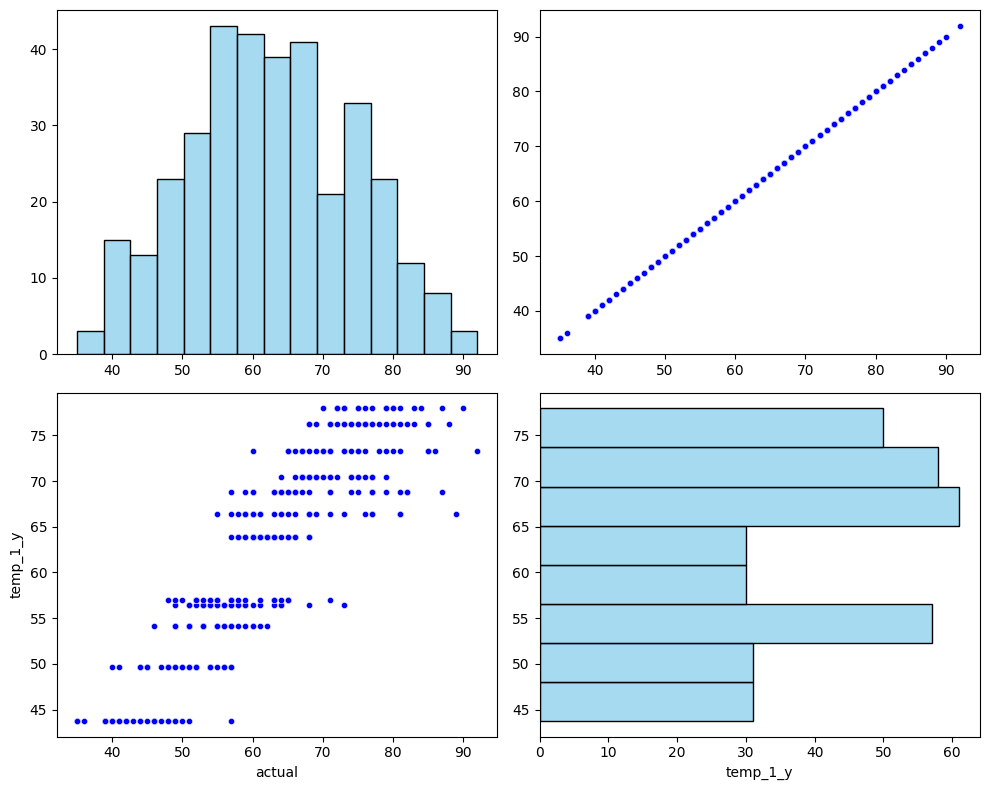

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la figura con los subplots
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 2)

# Histograma superior izquierdo
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(data=df2, x='actual', bins=15, ax=ax1, color='skyblue')
ax1.set_xlabel('')
ax1.set_ylabel('')

# Scatter plot superior derecho
ax2 = fig.add_subplot(gs[0, 1])
sns.scatterplot(data=df2, x='actual', y='actual', ax=ax2, color='blue', s=20)
ax2.set_xlabel('')
ax2.set_ylabel('')

# Scatter plot inferior izquierdo
ax3 = fig.add_subplot(gs[1, 0])
sns.scatterplot(data=df2, x='actual', y='temp_1_y', ax=ax3, color='blue', s=20)
ax3.set_xlabel('actual')
ax3.set_ylabel('temp_1_y')

# Histograma inferior derecho
ax4 = fig.add_subplot(gs[1, 1])
sns.histplot(data=df2, y='temp_1_y', bins=8, ax=ax4, color='skyblue')
ax4.set_xlabel('temp_1_y')
ax4.set_ylabel('')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [18]:
import seaborn as sns

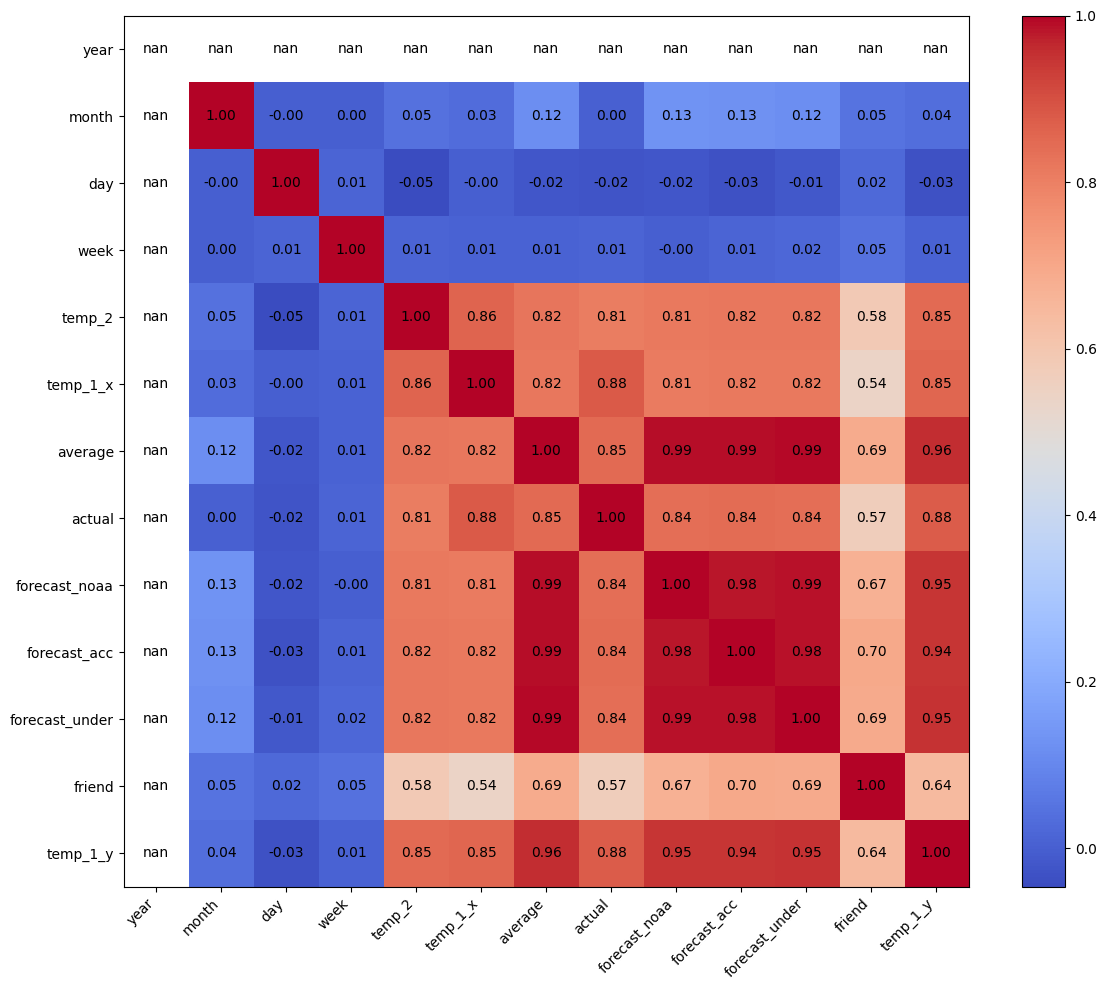

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de correlación
correlation_matrix = df2.corr()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 10))

# Crear el heatmap
im = ax.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')

# Añadir los valores numéricos
for i in range(len(correlation_matrix.index)):
    for j in range(len(correlation_matrix.columns)):
        text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                      ha='center', va='center', color='black')

# Configurar los ticks con los nombres de las variables
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))
ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(correlation_matrix.index)

# Añadir la barra de color
plt.colorbar(im)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el plot
plt.show()

In [20]:
import matplotlib.pyplot as plt

### 3. Divide en train y test

In [21]:
df3=df2[['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y','actual']]
    

In [22]:
from sklearn.model_selection import train_test_split


# Definir las variables independientes (X) y dependiente (y)
X = df3.drop(['actual'], axis=1)  # Todas las columnas excepto 'actual'
y = df3['actual']  # La columna objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,     # 20% para testing
    random_state=42    # Para reproducibilidad
)

# Imprimir las dimensiones de los conjuntos
print("Dimensiones de los conjuntos:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Dimensiones de los conjuntos:
X_train: (278, 9)
X_test: (70, 9)
y_train: (278,)
y_test: (70,)


### 4. Entrena el modelo


In [23]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [25]:
dtr.feature_importances_

array([0.01578458, 0.02326936, 0.7640919 , 0.10568129, 0.01386718,
       0.02214469, 0.03422755, 0.01486018, 0.00607328])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [26]:
# 3. Hacer predicciones
y_pred = dtr.predict(X_test)

In [27]:
y_pred

array([79., 68., 57., 68., 72., 81., 71., 79., 68., 73., 68., 65., 39.,
       60., 74., 57., 65., 59., 55., 79., 59., 57., 71., 60., 64., 49.,
       66., 45., 60., 82., 66., 68., 57., 90., 73., 60., 51., 51., 74.,
       40., 77., 59., 81., 41., 60., 76., 60., 87., 49., 39., 40., 39.,
       64., 64., 71., 61., 55., 61., 55., 53., 60., 46., 60., 71., 68.,
       59., 71., 68., 80., 39.])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.6834825963593055
MAE 5.2
MAPE 0.08264546591984298
MSE 44.25714285714286
RMSE 6.652604216180523


### 6. Representa el árbol de decision

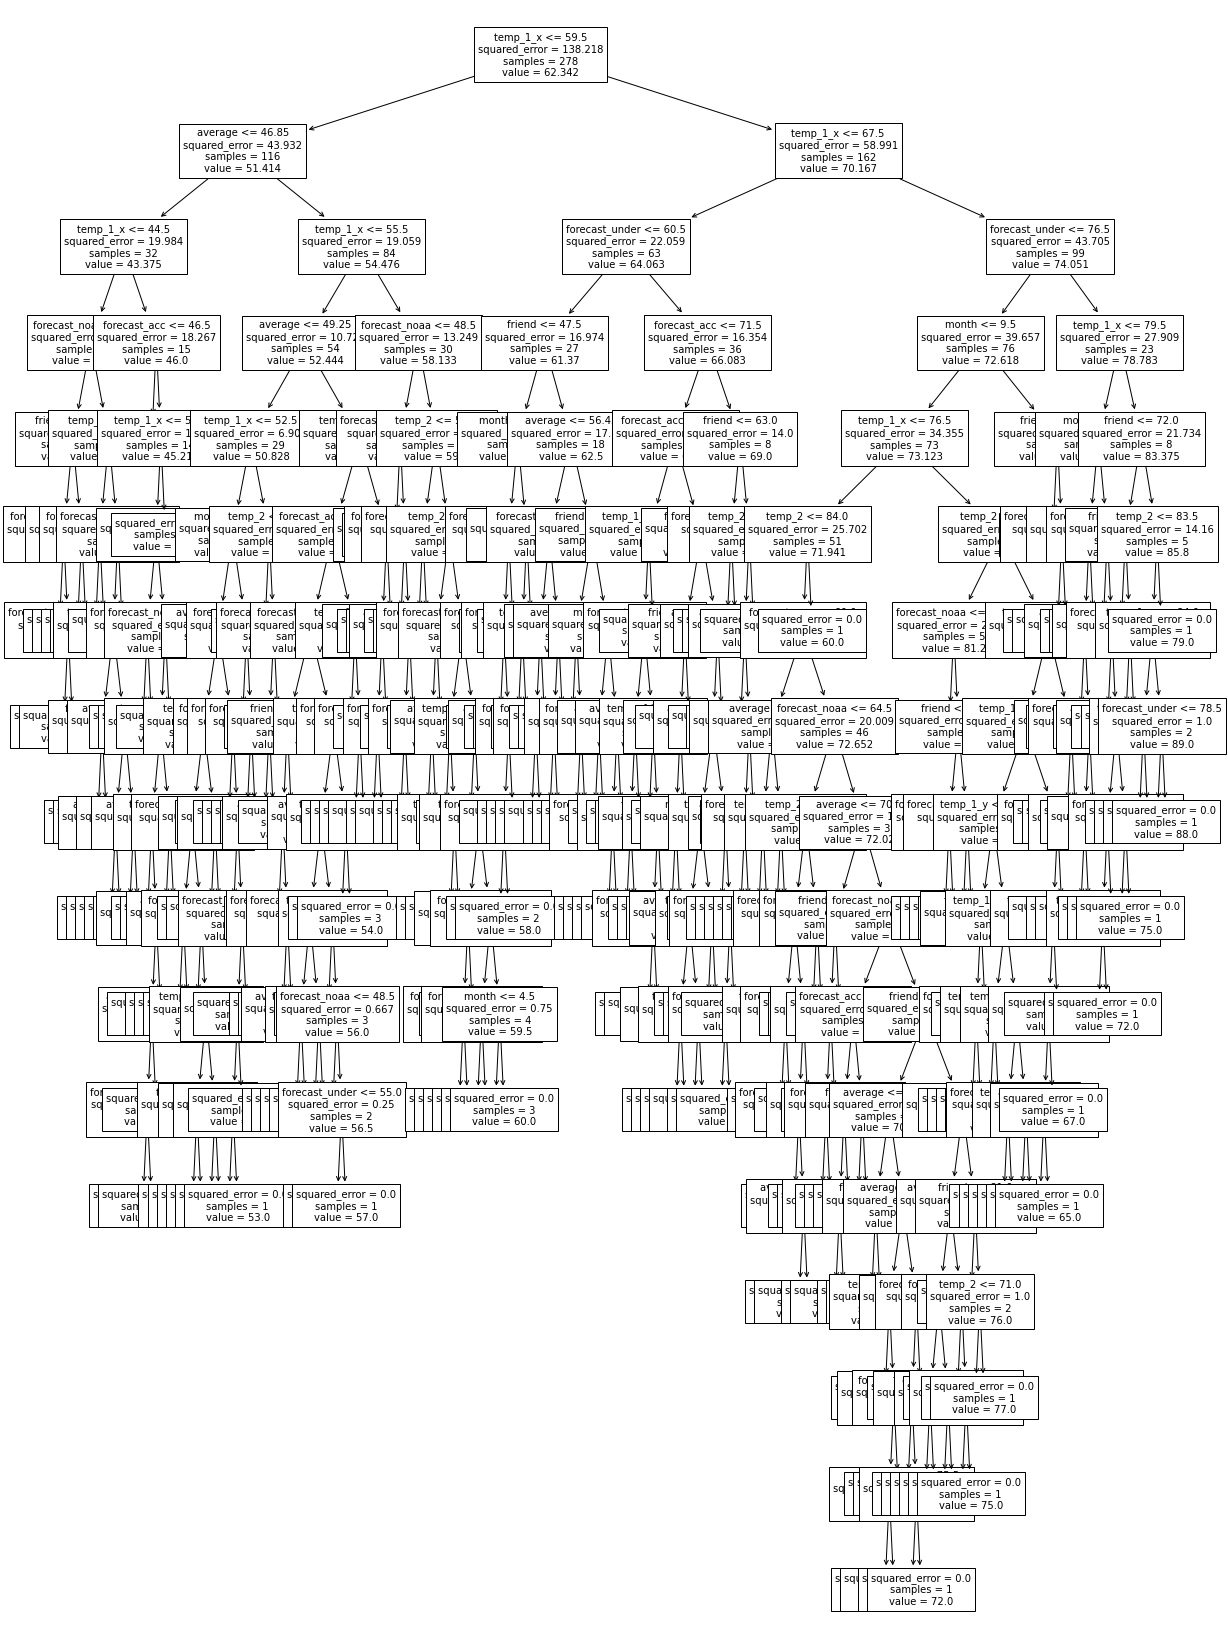

In [47]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [30]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

### 8. Vuelve a evaluar tu modelo

In [32]:
y_pred = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 9. Vuelve a representar su árbol

In [33]:
plt.figure(figsize=(15,15))

plot_tree(dtr_3, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool' or an instance of 'numpy.bool_' or None. Got 'actual' instead.

<Figure size 1500x1500 with 0 Axes>

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [35]:
dtr_3.feature_importances_

array([0.        , 0.        , 0.88020751, 0.08841159, 0.        ,
       0.        , 0.0313809 , 0.        , 0.        ])

In [36]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [37]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
2,temp_1_x,0.880208
3,average,0.088412
6,forecast_under,0.031381
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


In [38]:
X_train, X_test, y_train, y_test = train_test_split(df3[['temp_1_x','average','forecast_under']], df3['actual'], test_size=0.2, random_state=42)

In [39]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [40]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

In [41]:
# Crear la variable objetivo: 1 si la temperatura máxima es <= 15°C == 59°F , 0 si es mayor
df["target_clas"] = (df["actual"] <= 59).astype(int)





In [42]:
df[['actual', 'target_clas']]

,actual,target_clas
0,45,1
1,44,1
2,41,1
3,40,1
4,44,1
...,...,...
343,47,1
344,48,1
345,48,1
346,57,1


<Axes: >

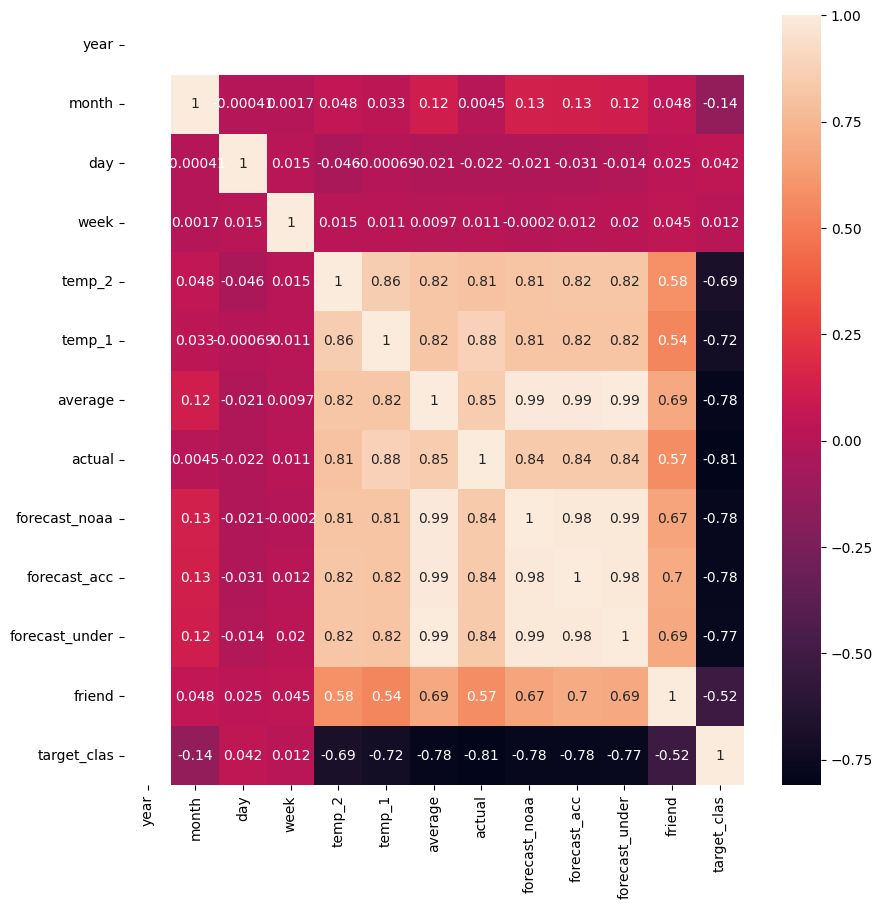

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [47]:
df['target_clas'].value_counts()

target_clas
0    204
1    144
Name: count, dtype: int64

In [49]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=3)

In [51]:
X_train.columns

Index(['temp_1_x', 'average', 'forecast_under'], dtype='object')

In [52]:
dtc.feature_importances_

array([0.        , 0.        , 0.09828577, 0.83792502, 0.05793051,
       0.        , 0.        , 0.0058587 ])

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1,dtc.predict(X_test1))

0.9142857142857143

In [54]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool' or an instance of 'numpy.bool_' or None. Got 'actual' instead.

<Figure size 1500x1500 with 0 Axes>

In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train1,y_train1)

accuracy_score(y_test1,lr.predict(X_test1))

/Users/isaromobru/Desktop/DS102024_/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9285714285714286

In [61]:
df2

,year,month,day,week,temp_2,temp_1_x,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,temp_1_y
0,2016,1,1,0,45,45,45.6,45,43,50,44,29,49.677419
1,2016,1,2,2,44,45,45.7,44,41,50,44,61,49.677419
2,2016,1,3,3,45,44,45.8,41,43,46,47,56,49.677419
3,2016,1,4,1,44,41,45.9,40,44,48,46,53,49.677419
4,2016,1,5,5,41,40,46.0,44,46,46,46,41,49.677419
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5,42,42,45.2,47,41,50,47,47,43.741935
344,2016,12,28,6,42,47,45.3,48,41,49,44,58,43.741935
345,2016,12,29,4,47,48,45.3,48,43,50,45,65,43.741935
346,2016,12,30,0,48,48,45.4,57,44,46,44,42,43.741935


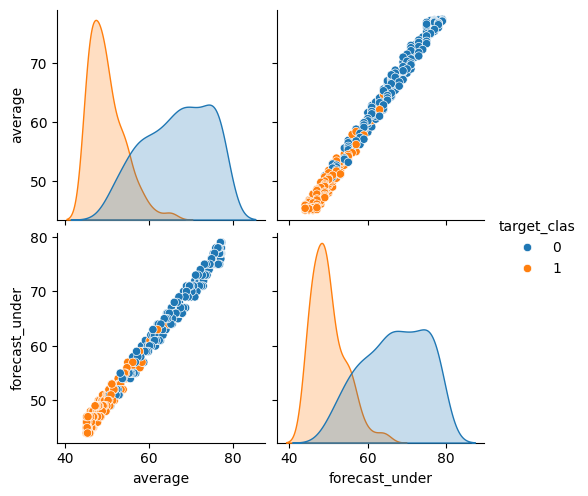

In [63]:
sns.pairplot(df[['average','forecast_under','target_clas']], hue='target_clas')